### Baseline model (returns the survived value based on its probability in training data set)

##### Import processed training data for baseline model

In [46]:
import pandas as pd
import numpy as np
import os as os
import sklearn

In [4]:
processed_dir_path=os.path.join(os.pardir,"data", "processed")
processed_data_path=os.path.join(processed_dir_path,"train.csv")
processed_test_path=os.path.join(processed_dir_path,"test.csv")

In [7]:
train_df=pd.read_csv(processed_data_path, index_col="PassengerId")
test_df=pd.read_csv(processed_test_path, index_col="PassengerId")

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Age                 891 non-null    float64
 2   Fare                891 non-null    float64
 3   Cabin               204 non-null    object 
 4   Family_Size         891 non-null    int64  
 5   IS_Mother           891 non-null    int64  
 6   Is_Male             891 non-null    int64  
 7   Deck_A              891 non-null    int64  
 8   Deck_B              891 non-null    int64  
 9   Deck_C              891 non-null    int64  
 10  Deck_D              891 non-null    int64  
 11  Deck_E              891 non-null    int64  
 12  Deck_F              891 non-null    int64  
 13  Deck_G              891 non-null    int64  
 14  Deck_T              891 non-null    int64  
 15  Deck_Z              891 non-null    int64  
 16  Pclass_1

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 418 non-null    float64
 1   Fare                418 non-null    float64
 2   Cabin               91 non-null     object 
 3   Family_Size         418 non-null    int64  
 4   IS_Mother           418 non-null    int64  
 5   Is_Male             418 non-null    int64  
 6   Deck_A              418 non-null    int64  
 7   Deck_B              418 non-null    int64  
 8   Deck_C              418 non-null    int64  
 9   Deck_D              418 non-null    int64  
 10  Deck_E              418 non-null    int64  
 11  Deck_F              418 non-null    int64  
 12  Deck_G              418 non-null    int64  
 13  Deck_T              418 non-null    int64  
 14  Deck_Z              418 non-null    int64  
 15  Pclass_1            418 non-null    int64  
 16  Pclas

In [18]:
train_df.drop("Cabin", axis=1, inplace=True)

In [26]:
X= train_df.loc[:,"Age":].to_numpy().astype('float')
y= train_df["Survived"].ravel()

In [28]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [30]:
print(X.shape, y.shape)

(891, 34) (891,)


##### Split Train and Test Matrix in 80:20 Ratio

In [33]:
!pip install scikit-learn

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

##### Check positive case data (Survival Rate) in train and test y matrics

In [44]:
#average Survival in train and test data
print("Survival Rate: ",np.mean(y_train))



Survival Rate:  0.38342696629213485


In [41]:
y_test.mean()

0.3854748603351955

In [47]:
sklearn.__version__

'0.24.1'

In [48]:
from sklearn.dummy import DummyClassifier

##### Create the dummy classifier

In [49]:
dummy_model= DummyClassifier(strategy="most_frequent", random_state=0)

##### Train the model

In [51]:
dummy_model.fit(X_train, y_train)

DummyClassifier(random_state=0, strategy='most_frequent')

##### Test the model

In [52]:
accuracy = dummy_model.score(X_test, y_test)

In [59]:
print ("Accuracy of the dummy classifier is {0:.2f}".format(accuracy))


Accuracy of the dummy classifier is 0.61


### Preparing Kaggle Submission

In [69]:
test_df.drop("Cabin", axis=1, inplace=True)

In [70]:
test_X=test_df.to_numpy().astype('float')

In [71]:
predictions= dummy_model.predict(test_X)

In [72]:
len(predictions)

418

In [73]:
len(test_df)

418

In [83]:
df_submission=pd.DataFrame({'PassengerId':test_df.index,'Survived':predictions})

In [75]:
df_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


### Create Kaggle Submission file

In [80]:
submission_data_path=os.path.join(os.pardir, 'data', 'external')
submission_file_path= os.path.join(submission_data_path,"01_dummy.csv")

In [84]:
df_submission.to_csv(submission_file_path, index=False)

### Logistic Regression Model

In [85]:
from  sklearn.linear_model import LogisticRegression

In [86]:
model=LogisticRegression(random_state=0)

In [87]:
model.fit(X_train, y_train)

c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [88]:
model.score(X_test, y_test)

0.8324022346368715

In [89]:
predictions= model.predict(test_X)

In [91]:
len(predictions)

418

In [92]:
new_submission= pd.DataFrame({'PassengerId':test_df.index,'Survived':predictions})

### New Sumissions

In [95]:
submission_data_path=os.path.join(os.pardir, 'data', 'external')
submission_file_path= os.path.join(submission_data_path,"02_lr.csv")

In [98]:
new_submission.to_csv(submission_file_path, index=False)

### Regularization Techniques

##### Hyperparameters Optimizations

In [116]:
model_lr=LogisticRegression(random_state=0, max_iter=100)

In [117]:
from sklearn.model_selection import GridSearchCV

In [131]:
params={'C':[1, 1.1,10,50,100], 'penalty':["l1","l2"]}

In [132]:
clf=GridSearchCV(model_lr, param_grid=params, cv=3)

In [133]:
clf.fit(X_train, y_train)

c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  

c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  

c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 1.1, 10, 50, 100], 'penalty': ['l1', 'l2']})

In [134]:
clf.best_params_

{'C': 1, 'penalty': 'l2'}

In [135]:
clf.best_score_

0.8286943469370871

In [136]:
clf.score(X_test, y_test)

0.8324022346368715

### Preparing 3rd Kaggle Submission

In [137]:
predictions= clf.predict(test_X)

In [138]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [139]:
df_submission3=pd.DataFrame({'PassengerId':test_df.index,'Survived':predictions})

In [140]:
df_submission3

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [141]:
submission_data_path=os.path.join(os.pardir, 'data', 'external')
submission_file_path= os.path.join(submission_data_path,"02lr.csv")

In [142]:
df_submission3.to_csv(submission_file_path, index=False)

In [144]:
train_df.Age.max()

80.0

In [145]:
train_df.Age.min()

0.42

<AxesSubplot:ylabel='Frequency'>

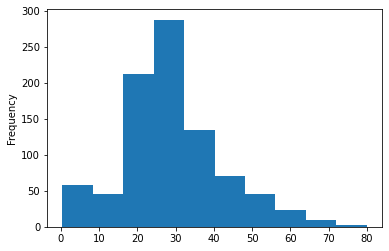

In [149]:
train_df.Age.plot(kind="hist")

### Feature Normalization and Standardization Techniques

<AxesSubplot:ylabel='Frequency'>

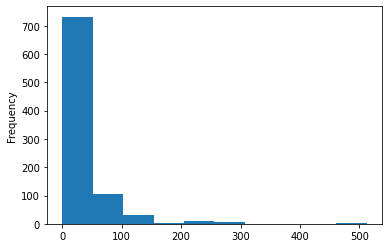

In [150]:
train_df.Fare.plot(kind="hist")

In [151]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [156]:
scaler =StandardScaler()

In [157]:
X_train_scaled=scaler.fit_transform(X_train)

In [158]:
X_train_scaled

array([[ 0.42963418, -0.33167904,  0.64853393, ..., -1.62827579,
         0.39477102, -0.39477102],
       [ 0.12976942, -0.42640542, -0.55395606, ...,  0.61414657,
         0.39477102, -0.39477102],
       [ 0.12976942,  0.10261958,  0.64853393, ..., -1.62827579,
         0.39477102, -0.39477102],
       ...,
       [-0.02016296, -0.48162887, -0.55395606, ..., -1.62827579,
         0.39477102, -0.39477102],
       [ 0.50460037, -0.28868112,  0.04728893, ...,  0.61414657,
         0.39477102, -0.39477102],
       [ 2.30378891,  0.14245584,  0.64853393, ...,  0.61414657,
         0.39477102, -0.39477102]])

In [159]:
clf.fit(X_train_scaled, y_train)

c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  

c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\avate avil\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 1.1, 10, 50, 100], 'penalty': ['l1', 'l2']})

In [164]:
clf.best_score_

0.8089978607476747

### Model Persistance

In [166]:
import pickle

In [167]:
model_file_path=os.path.join(os.pardir,"models", "lr_model.pkl")
scaler_file_path=os.path.join(os.pardir,"models","scalr_model.pkl")

In [170]:
model_file_pickle=open(model_file_path,"wb")
scaler_file_pickle=open(scaler_file_path,"wb")

In [171]:
pickle.dump(clf, model_file_pickle)
pickle.dump(scaler, scaler_file_pickle)

In [172]:
model_file_pickle.close()

In [173]:
scaler_file_pickle.close()

##### Load pickled files

In [181]:
model_file_pickle=open(model_file_path,'rb')

In [182]:
scaler_file_pickle=open(scaler_file_path,'rb')

In [183]:
clf_loaded=pickle.load(model_file_pickle)

In [184]:
scaler_loaded=pickle.load(scaler_file_pickle)

In [185]:
model_file_pickle.close()
scaler_file_pickle.close()

In [186]:
clf_loaded

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 1.1, 10, 50, 100], 'penalty': ['l1', 'l2']})

In [187]:
scaler_loaded


StandardScaler()

In [ ]:
scaler_loaded